# Charts to Graph
•	What has been 5 year trend of DFW Home Sales Price? Sean
•	Comparison of 2020 vs prior year(s) - Vickie**
•	What was the average Days on market? Collin
•	Is it more a buyers market or sellers market? Collin
•	What are the average/mid/max price for homes by zip codes – Nikki
•	Sales Price Ranges based on # of bedrooms / lot size- Vickie**
•	Future Trends – linear regression chart – eric 
•	Year over Year Appreciation - Nikki

In [1]:
#Comparison of 2020 to prior years 
#Average price range for homes listed and number of bedrooms

In [2]:
#Import Dependences
%matplotlib inline
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [3]:
#Open CSV File
mls_data = "../datacleaning/CleanedMLSData.csv"

# Read File and store into Pandas data frame
mls_data_df = pd.read_csv("../datacleaning/CleanedMLSData.csv", sep=",",
                                 usecols = ["MLS #",
                                            "Status","City",
                                            "Listing Date",
                                            "Listing Date",
                                            "Close Date",
                                            "Original List Price",
                                            "List Price",
                                            "Close Date",
                                            "Close Price",
                                            "SqFt Total",
                                            "Beds Total",
                                            "Status Change Timestamp"], index_col=0)

mls_data_df.head()

,Status,City,List Price,Original List Price,SqFt Total,Close Price,Beds Total,Listing Date,Close Date,Status Change Timestamp
MLS #,,,,,,,,,,
14112331,S,Cedar Hill,95000.0,95000.0,1310.0,109300.0,3,2019-06-09,2019-06-25,2019-07-04
14075152,S,Cedar Hill,119000.0,119000.0,1260.0,111268.0,3,2019-05-02,2019-06-04,2019-06-06
14088584,S,Cedar Hill,110000.0,110000.0,1002.0,112000.0,2,2019-05-11,2019-05-31,2019-06-03
14086347,S,Cedar Hill,129900.0,129900.0,1085.0,120000.0,3,2019-05-11,2019-06-21,2019-06-24
14094254,S,Cedar Hill,119900.0,119900.0,1031.0,120000.0,3,2019-05-19,2019-06-04,2019-06-25


In [4]:
#convert list/close dates to Year_Month format
mls_data_df['Listing Date'] = pd.to_datetime(mls_data_df['Listing Date'])
mls_data_df['List mth_yr'] = mls_data_df['Listing Date'].apply(lambda x: x.strftime('%Y-%B')) 
mls_data_df['List Year'] = mls_data_df['Listing Date'].dt.year
mls_data_df['List Month'] = mls_data_df['Listing Date'].dt.month

#DateClosed=create if statement for close date null values to use last stamped date
mls_data_df['Close Date'] = mls_data_df['Close Date'].fillna(mls_data_df['Status Change Timestamp'])
mls_data_df['Close Date'] = pd.to_datetime(mls_data_df['Close Date'], errors='coerce')
mls_data_df['Close mth_yr'] = mls_data_df['Close Date'].apply(lambda x: x.strftime('%Y-%B')) 
mls_data_df['Close Year'] = mls_data_df['Close Date'].dt.year
mls_data_df['Close Month'] = mls_data_df['Close Date'].dt.month
mls_data_df['Count'] = 1
#mls_data_df['Status'] = mls_data_df.Status == "S"

#Calculate Days on Market
mls_data_df["Days on Market"] = mls_data_df['Close Date'] - mls_data_df['Listing Date']
mls_data_df.head()

,Status,City,List Price,Original List Price,SqFt Total,Close Price,Beds Total,Listing Date,Close Date,Status Change Timestamp,List mth_yr,List Year,List Month,Close mth_yr,Close Year,Close Month,Count,Days on Market
MLS #,,,,,,,,,,,,,,,,,,
14112331,S,Cedar Hill,95000.0,95000.0,1310.0,109300.0,3,2019-06-09,2019-06-25,2019-07-04,2019-June,2019,6,2019-June,2019,6,1,16 days
14075152,S,Cedar Hill,119000.0,119000.0,1260.0,111268.0,3,2019-05-02,2019-06-04,2019-06-06,2019-May,2019,5,2019-June,2019,6,1,33 days
14088584,S,Cedar Hill,110000.0,110000.0,1002.0,112000.0,2,2019-05-11,2019-05-31,2019-06-03,2019-May,2019,5,2019-May,2019,5,1,20 days
14086347,S,Cedar Hill,129900.0,129900.0,1085.0,120000.0,3,2019-05-11,2019-06-21,2019-06-24,2019-May,2019,5,2019-June,2019,6,1,41 days
14094254,S,Cedar Hill,119900.0,119900.0,1031.0,120000.0,3,2019-05-19,2019-06-04,2019-06-25,2019-May,2019,5,2019-June,2019,6,1,16 days


In [5]:
mls_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170557 entries, 14112331 to 14066195
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Status                   170557 non-null  object         
 1   City                     170557 non-null  object         
 2   List Price               170557 non-null  float64        
 3   Original List Price      170540 non-null  float64        
 4   SqFt Total               170548 non-null  float64        
 5   Close Price              133245 non-null  float64        
 6   Beds Total               170557 non-null  int64          
 7   Listing Date             170557 non-null  datetime64[ns] 
 8   Close Date               170557 non-null  datetime64[ns] 
 9   Status Change Timestamp  170557 non-null  object         
 10  List mth_yr              170557 non-null  object         
 11  List Year                170557 non-null  int64         

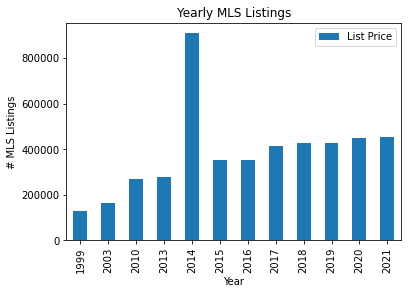

In [6]:
#Yearly MLS Listing totals
MLSbyyear = pd.pivot_table(mls_data_df,index=["List Year"],values=["List Price"])
MLSbyyear.plot(kind='bar')
plt.title("Yearly MLS Listings")
plt.xlabel("Year")
plt.ylabel("# MLS Listings")
plt.savefig("Yearly MLS Totals.png")
plt.show()

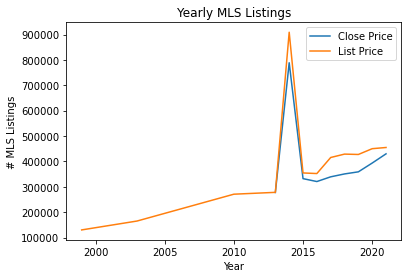

In [7]:
#create by year average list/close price
avglistcloseprice = pd.pivot_table(mls_data_df,index=["List Year"],values=["List Price", "Close Price"])
avglistcloseprice.plot(kind='line')
plt.title("Yearly MLS Listings")
plt.xlabel("Year")
plt.ylabel("# MLS Listings")
plt.savefig("AVGListClosePrice.png")
plt.show()

In [ ]:
# of bedrooms by avg listing price
plt.title("# of Bedrooms vs Avg Listing Price")
plt.xlabel("# of Bedrooms")
plt.ylabel("List Price")
plt.bar(mls_data_df["Beds Total"], mls_data_df["List Price"],color = "blue")

plt.savefig("AveragePricePerBeds1.png")
plt.show()

In [ ]:
#create avg Listing Price per bedroom size (pivot)
avgpriceperbed = pd.pivot_table(mls_data_df,index=["Beds Total"],values=["List Price"])
avgpriceperbed.plot(kind='bar')
plt.title("Average Price by # of Bedrooms")
plt.xlabel("# of Bedrooms")
plt.ylabel("List Price")
plt.savefig("AveragePricePerBeds2.png")
plt.show()

In [ ]:
#create avg sq ft per # of bedrooms
avgsqftbed = pd.pivot_table(mls_data_df,index=["Beds Total"],values=["SqFt Total"])
avgsqftbed.plot(kind='bar')
plt.title("Average Sq Footage by # of Bedrooms")
plt.xlabel("# of Bedrooms")
plt.ylabel("Avg Sq Ft")
plt.savefig("AverageSqFtPerBeds.png")
plt.show()